# [Bài tập] Phân tích bộ dữ liệu Online Retail

In [1]:
# import thư viện
import pandas as pd
import seaborn as sns
import numpy as numpy
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [2]:
# đọc dữ liệu
df = pd.read_csv('OnlineRetail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Cột Description va CustomerID có giá trị null

In [4]:
# Mô tả dữ liệu
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [46]:
# Sử dụng isNa để tìm dữ liệu khuyết thiếu
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [47]:
# Tìm xem có bao nhiêu dòng có giá trị khuyết thiếu
df1 = df.dropna()

df.shape[0]-df1.shape[0]

135080

In [48]:
# Tìm cột có giá trị khuyết thiếu
df2 = df.dropna(axis='columns')
df2

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,France
541905,581587,22899,6,12/9/2011 12:50,2.10,France
541906,581587,23254,4,12/9/2011 12:50,4.15,France
541907,581587,23255,4,12/9/2011 12:50,4.15,France


Sử dụng kiến thức bản thân để xác định dữ liệu khuyết thiếu có gây ảnh hưởng
- Có 2 cột bị xoá ở trên nghĩa là cột Description và Customer ID có chứa na
- 135080 dòng có giá trị khuyết thiếu --> số lượng không nhỏ
- không nên xoá các dòng có giá trị khuyết thiếu vì không phản ánh chính xác doanh thu. Có invoice nghĩa là có sản phẩm đc bán ra. Tuy nhiên invoice thiếu mất nhận dạng sản phẩm và ID khách hàng

In [38]:
# thay thế giá trị khuyết thiếu của thuộc tính Description bằng giá trị mặc định “Không biết"
df['Description'].fillna('Không biết')

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905            CHILDREN'S APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908           BAKING SET 9 PIECE RETROSPOT
Name: Description, Length: 541909, dtype: object

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

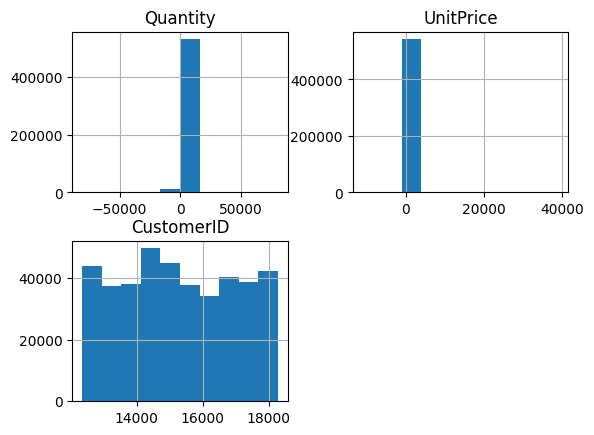

In [50]:
# dùng histogram xem phân bổ dữ liệu
df.hist()

In [68]:
# Giá trị ngoại lai của thuộc tính Quantity chứa giá trị <0, giá trị ngoại lai của UnitPrice <=0
# DataFrame chứa giá trị ngoại lai

outlier_df = df[(df['UnitPrice'] <= 0) | (df['Quantity'] <0)]

In [8]:
# DataFrame chứa giá trị bình thường
normal_df = df[(df['UnitPrice'] > 0) & (df['Quantity'] >=0)]

In [10]:
# Mô tả dữ liệu ban đầu
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Mô tả và nhận xet dữ liệu ban đầu

- Trung bình giá một sản phẩm là 4.61
- độ lêch chuẩn của giá là 35.91 -> mức chênh lệch giá của các sản phẩm so với giá trung bình rất cao
- giá unit price nhỏ nhất là -11062 -> giá trị sai vì không thể có giá trị âm và rất xa trung bình
- giá unit price lớn nhất là 38970 - giá trị lớn và cách xa giá trung bình nhiều -> outlier
- 25% 1.25 -> 25% sp có giá mỗi sp dưới 1.25 -> nhỏ hơn nhưng khá gần với trung bình
- 50% 2.08 -> 50% sp có giá mỗi sp dưới 2.08 -> nhỏ hơn nhưng khá gần với trung bình
- 75% 4.13 -> 75% sp có giá mỗi sp dưới 4.13 -> nhỏ hơn trung bình -> phần lớn dữ liệu thiên về giá thấp nhưng có nhiều dữ liệu ngoại lai có giá trị cao hẳn 


In [11]:
# Mô tả dữ liệu sau khi lọc outlier
normal_df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


Mô tả thông tin của bộ dữ liệu và nhận xét. 
Dữ liệu mô tả tình hình kinh doanh của một doanh nghiệp bán hàng online

- Trung bình giá một sản phẩm là 3.90
- độ lêch chuẩn của giá là 35.91 -> mức chênh lệch giá của các sản phẩm so với giá trung bình hơi lớn nhưng đã giảm đi khá nhiều so với dữ liệu ban đầu có độ lệch chuẩn là 95.76
- giá unit price nhỏ nhất là 0.001 -> giá trị gần với trung bình
- giá unit price lớn nhất là 13541 - giá trị lớn và cách xa giá trung bình nhiều -> khả năng là outlier
- 25% 1.25 -> 25% sp có giá mỗi sp dưới 1.25 -> nhỏ hơn nhưng khá gần với trung bình
- 50% 2.08 -> 50% sp có giá mỗi sp dưới 2.08 -> nhỏ hơn nhưng khá gần với trung bình
- 75% 4.13 -> 75% sp có giá mỗi sp dưới 4.13 -> lớn hơn trung bình -> phần lớn dữ liệu thiên về giá thấp nhưng phân bố đã gần chuẩn hơn so với dữ liệu ban đầu

Nhận xét: sau khi xử lý outlier, phân bố dữ liệu đã đều hơn và ít đi các giá trị sai (ví dụ như giá trị âm). Vẫn còn các giá trị có thể là outlier như giá trị max đang khá xa so với trung bình

Đề xuất: 
- tìm và xử lý ngoại lai theo IQR hoặc std
